### Primeiro teste: dados versão 2

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('https://github.com/IgorNascAlves/data_flight_delays/blob/main/data/flights2.csv?raw=true')

In [5]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,22,FP,Boeing 787,schengen,PFL,19.380221,21.380221,0,2010,False,68.237741
1,13,MN,Boeing 787,schengen,WGU,8.901000,11.901000,0,2010,False,12.638385
2,29,FP,Boeing 777,schengen,BFE,17.676629,21.676629,0,2010,False,58.989720
3,11,MN,Airbus A320,non-schengen,YEY,10.083809,12.083809,0,2010,False,3.989793
4,22,FP,Boeing 787,schengen,PFL,19.380221,21.380221,0,2010,False,69.832144


In [6]:
df.shape

(71175, 11)

In [7]:
df.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin                9
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             71175
dtype: int64

In [8]:
df.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [9]:
# List of categorical variables
categorical_vars = ['airline', 'aircraft_type', 'origin']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)

In [10]:
# Transformando valores 'False' e 'True' em 0 e 1
df_encoded['is_holiday'] = df_encoded['is_holiday'].map({False: 0, True: 1})
df_encoded['schengen'] = df_encoded['schengen'].map({'non-schengen': 0, 'schengen': 1})

In [11]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,airline_FP,airline_MN,...,aircraft_type_Embraer E175,origin_BFE,origin_FOC,origin_GXL,origin_HPF,origin_PFL,origin_TPV,origin_UZA,origin_WGU,origin_YEY
0,22,1,19.380221,21.380221,0,2010,0,68.237741,1,0,...,0,0,0,0,0,1,0,0,0,0
1,13,1,8.901000,11.901000,0,2010,0,12.638385,0,1,...,0,0,0,0,0,0,0,0,1,0
2,29,1,17.676629,21.676629,0,2010,0,58.989720,1,0,...,0,1,0,0,0,0,0,0,0,0
3,11,0,10.083809,12.083809,0,2010,0,3.989793,0,1,...,0,0,0,0,0,0,0,0,0,1
4,22,1,19.380221,21.380221,0,2010,0,69.832144,1,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
# Dividindo o conjunto de dados em treinamento e teste
X = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'delay'], axis=1)
y = df_encoded['delay']

In [13]:
X.head()

,schengen,arrival_time,is_holiday,airline_FP,airline_MN,airline_ZG,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Boeing 737,aircraft_type_Boeing 777,...,aircraft_type_Embraer E175,origin_BFE,origin_FOC,origin_GXL,origin_HPF,origin_PFL,origin_TPV,origin_UZA,origin_WGU,origin_YEY
0,1,19.380221,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,8.901000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,17.676629,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0,10.083809,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,19.380221,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
y.head()

0    68.237741
1    12.638385
2    58.989720
3     3.989793
4    69.832144
Name: delay, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Treinando o modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Absolute Error: 14.368786527646508
Mean Squared Error: 324.47943277121556
Root Mean Squared Error: 18.01331265401274
R-squared: 0.4592131976993802


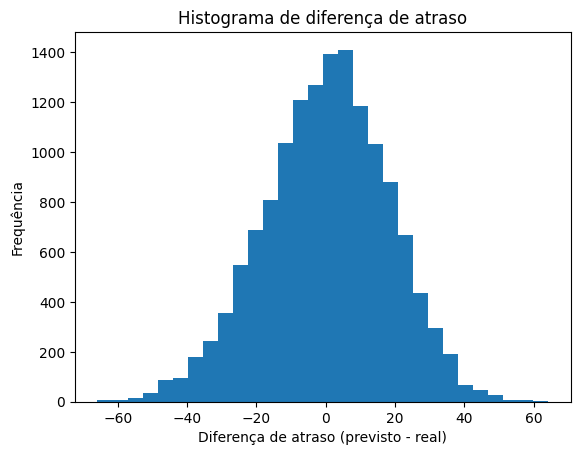

In [18]:
import matplotlib.pyplot as plt

# Calcular a diferença entre atrasos previstos e reais
delay_diff = y_pred - y_test

# Plotar histograma de diferença de atraso
plt.hist(delay_diff, bins=30)
plt.xlabel("Diferença de atraso (previsto - real)")
plt.ylabel("Frequência")
plt.title("Histograma de diferença de atraso")
plt.show()

In [19]:
# Obtendo a importância das features
feature_importance = model.feature_importances_

# Criando um DataFrame para visualizar as importâncias das features
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Imprimindo as importâncias das features
print(feature_importance_df)

                       Feature  Importance
3                   airline_FP    0.754198
2                   is_holiday    0.235522
4                   airline_MN    0.006513
1                 arrival_time    0.001377
5                   airline_ZG    0.001071
6    aircraft_type_Airbus A320    0.000164
14                  origin_GXL    0.000157
17                  origin_TPV    0.000148
9     aircraft_type_Boeing 777    0.000127
16                  origin_PFL    0.000099
19                  origin_WGU    0.000087
15                  origin_HPF    0.000079
13                  origin_FOC    0.000076
18                  origin_UZA    0.000072
0                     schengen    0.000069
11  aircraft_type_Embraer E175    0.000061
8     aircraft_type_Boeing 737    0.000046
12                  origin_BFE    0.000042
10    aircraft_type_Boeing 787    0.000041
7    aircraft_type_Airbus A330    0.000026
20                  origin_YEY    0.000024


### Segundo teste: dados versão 3 (adição de noise)

In [20]:
df_3 = pd.read_csv('https://github.com/IgorNascAlves/data_flight_delays/blob/main/data/flights3.csv?raw=true')

In [21]:
df_3

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,6,RF,Airbus A320,schengen,JTI,7.873290,12.873290,0,2010,False,-0.487117
1,2,RF,Boeing 737,schengen,QNK,18.331222,21.331222,0,2010,False,12.599096
2,20,TO,Airbus A320,non-schengen,JTI,9.367756,11.367756,0,2010,False,-1.831840
3,4,WS,Airbus A330,schengen,QNK,17.885589,19.885589,0,2010,False,28.700556
4,8,RF,Airbus A320,schengen,QNK,16.224098,18.224098,0,2010,False,6.827155
...,...,...,...,...,...,...,...,...,...,...,...
71170,4,WS,Airbus A330,schengen,QNK,17.885589,19.885589,364,2022,False,53.819913
71171,29,RF,Airbus A320,non-schengen,GQL,9.058546,13.058546,364,2022,False,-13.532163
71172,30,WS,Airbus A330,schengen,GQL,17.747189,20.747189,364,2022,False,73.378419
71173,17,WS,Airbus A320,schengen,SQZ,17.594886,19.594886,364,2022,False,65.559022


In [22]:
# List of categorical variables
categorical_vars = ['airline', 'aircraft_type', 'origin']

# Perform one-hot encoding
df_encoded_3 = pd.get_dummies(df_3, columns=categorical_vars, dtype=int)

In [23]:
# Transformando valores 'False' e 'True' em 0 e 1
df_encoded_3 ['is_holiday'] = df_encoded_3 ['is_holiday'].map({False: 0, True: 1})
df_encoded_3 ['schengen'] = df_encoded_3 ['schengen'].map({'non-schengen': 0, 'schengen': 1})

In [24]:
df_encoded_3.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,airline_RF,airline_TO,...,origin_CLY,origin_GQL,origin_JTI,origin_JYW,origin_MFS,origin_QKU,origin_QNK,origin_SQZ,origin_TLY,origin_UEF
0,6,1,7.873290,12.873290,0,2010,0,-0.487117,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2,1,18.331222,21.331222,0,2010,0,12.599096,1,0,...,0,0,0,0,0,0,1,0,0,0
2,20,0,9.367756,11.367756,0,2010,0,-1.831840,0,1,...,0,0,1,0,0,0,0,0,0,0
3,4,1,17.885589,19.885589,0,2010,0,28.700556,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8,1,16.224098,18.224098,0,2010,0,6.827155,1,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
X = df_encoded_3 .drop(['flight_id', 'day', 'year','departure_time', 'day', 'year', 'delay'], axis=1)
y = df_encoded_3 ['delay']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Absolute Error: 14.202107913446913
Mean Squared Error: 318.2606507986623
Root Mean Squared Error: 17.839861288660916
R-squared: 0.6314775961957828


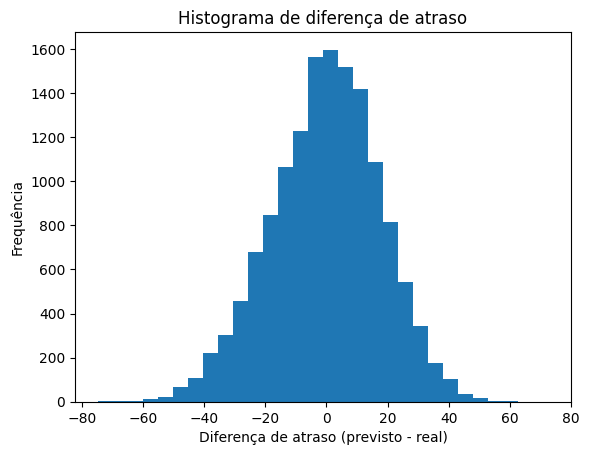

In [27]:
# Calcular a diferença entre atrasos previstos e reais
delay_diff = y_pred - y_test

# Plotar histograma de diferença de atraso
plt.hist(delay_diff, bins=30)
plt.xlabel("Diferença de atraso (previsto - real)")
plt.ylabel("Frequência")
plt.title("Histograma de diferença de atraso")
plt.show()

In [28]:
# Obtendo a importância das features
feature_importance = model.feature_importances_

# Criando um DataFrame para visualizar as importâncias das features
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Imprimindo as importâncias das features
print(feature_importance_df)

                       Feature  Importance
5                   airline_WS    0.897369
2                   is_holiday    0.100279
4                   airline_TO    0.000871
1                 arrival_time    0.000433
3                   airline_RF    0.000336
18                  origin_QNK    0.000090
13                  origin_GQL    0.000064
8     aircraft_type_Boeing 737    0.000064
6    aircraft_type_Airbus A320    0.000060
14                  origin_JTI    0.000059
7    aircraft_type_Airbus A330    0.000055
20                  origin_TLY    0.000046
15                  origin_JYW    0.000038
0                     schengen    0.000037
19                  origin_SQZ    0.000033
12                  origin_CLY    0.000031
21                  origin_UEF    0.000029
16                  origin_MFS    0.000025
17                  origin_QKU    0.000025
9     aircraft_type_Boeing 777    0.000021
11  aircraft_type_Embraer E175    0.000018
10    aircraft_type_Boeing 787    0.000017


Testando o modelo Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Treinando o modelo
model_boosting = GradientBoostingRegressor()
model_boosting.fit(X_train, y_train)

# Fazendo previsões
y_pred_boosting = model_boosting.predict(X_test)

# Avaliando o modelo

mae = mean_absolute_error(y_test, y_pred_boosting)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred_boosting)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred_boosting, squared=False)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred_boosting)
print('R-squared:', r2)

Mean Absolute Error: 14.199166116899669
Mean Squared Error: 318.15775763712094
Root Mean Squared Error: 17.836977256169863
R-squared: 0.631596738902024


## Terceiro teste: dados versão 4 (Mudanças no delay)

In [29]:
df_4 = pd.read_csv('https://github.com/IgorNascAlves/data_flight_delays/blob/main/data/flights4.csv?raw=true')

In [30]:
df_4.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,5,RG,Airbus A320,non-schengen,BYU,15.135172,19.135172,0,2010,False,44.552479
1,19,SR,Boeing 737,schengen,LZW,10.698807,13.698807,0,2010,False,30.931739
2,19,SR,Boeing 737,schengen,LZW,10.698807,13.698807,0,2010,False,12.522989
3,26,RG,Boeing 787,non-schengen,NNN,16.970906,19.970906,0,2010,False,38.306160
4,3,SR,Boeing 737,schengen,YOG,8.431066,11.431066,0,2010,False,18.484254


In [31]:
# List of categorical variables
categorical_vars = ['airline', 'aircraft_type', 'origin']

# Perform one-hot encoding
df_encoded_4 = pd.get_dummies(df_4, columns=categorical_vars, dtype=int)

In [32]:
# Transformando valores 'False' e 'True' em 0 e 1
df_encoded_4['is_holiday'] = df_encoded_4['is_holiday'].map({False: 0, True: 1})
df_encoded_4['schengen'] = df_encoded_4['schengen'].map({'non-schengen': 0, 'schengen': 1})

In [37]:
df_encoded_4.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,airline_OI,airline_RG,...,origin_BYU,origin_ESB,origin_GXN,origin_JRT,origin_LZW,origin_NBI,origin_NNN,origin_PWR,origin_YKZ,origin_YOG
0,5,0,15.135172,19.135172,0,2010,0,44.552479,0,1,...,1,0,0,0,0,0,0,0,0,0
1,19,1,10.698807,13.698807,0,2010,0,30.931739,0,0,...,0,0,0,0,1,0,0,0,0,0
2,19,1,10.698807,13.698807,0,2010,0,12.522989,0,0,...,0,0,0,0,1,0,0,0,0,0
3,26,0,16.970906,19.970906,0,2010,0,38.306160,0,1,...,0,0,0,0,0,0,1,0,0,0
4,3,1,8.431066,11.431066,0,2010,0,18.484254,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
#create feature is weekend day
df_encoded_4['is_weekend'] = df_encoded_4['day'].apply(lambda day: day % 7 == 0 or day % 7 == 6)

In [42]:
X = df_encoded_4.drop(['flight_id', 'day', 'year','departure_time', 'day', 'year', 'delay'], axis=1)
y = df_encoded_4['delay']

In [45]:
X.columns

Index(['schengen', 'arrival_time', 'is_holiday', 'airline_OI', 'airline_RG',
       'airline_SR', 'aircraft_type_Airbus A320', 'aircraft_type_Airbus A330',
       'aircraft_type_Boeing 737', 'aircraft_type_Boeing 777',
       'aircraft_type_Boeing 787', 'origin_BYU', 'origin_ESB', 'origin_GXN',
       'origin_JRT', 'origin_LZW', 'origin_NBI', 'origin_NNN', 'origin_PWR',
       'origin_YKZ', 'origin_YOG', 'is_weekend'],
      dtype='object')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state=42

# Treinando o modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Absolute Error: 14.51171519630914
Mean Squared Error: 333.5853748981984
Root Mean Squared Error: 18.264319721747054
R-squared: 0.5491452762830957


In [52]:
# Treinar o modelo de regressão
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Obter a importância das características
feature_importances = model.feature_importances_

# Exibir a importância das características
for feature_name, importance in zip(X.columns, feature_importances):
    print(f"{feature_name}: {importance}")

# Definir o limite para selecionar as características mais importantes
threshold = 0.03  # Ajuste o valor do limite conforme necessário

# Selecionar as características mais importantes
selected_features = X.columns[feature_importances > threshold]

# Filtrar o conjunto de treinamento e teste usando as características selecionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Retreinar o modelo com as características selecionadas
model_selected = RandomForestRegressor()
model_selected.fit(X_train_selected, y_train)

# Fazer previsões com o conjunto de teste usando o modelo com características selecionadas
y_pred_selected = model_selected.predict(X_test_selected)

# Avaliar a performance do modelo com características selecionadas
mae = mean_absolute_error(y_test, y_pred_selected)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred_selected)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred_selected, squared=False)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred_selected)
print('R-squared:', r2)

schengen: 0.001696776847294533
arrival_time: 0.01665274172634214
is_holiday: 0.1609983959373502
airline_OI: 0.31849595660169167
airline_RG: 0.09424234209799923
airline_SR: 0.04841271772633523
aircraft_type_Airbus A320: 0.0025680550327509552
aircraft_type_Airbus A330: 0.00032782032409928126
aircraft_type_Boeing 737: 0.01562300941740455
aircraft_type_Boeing 777: 0.0014733960758904494
aircraft_type_Boeing 787: 0.08476623169096616
origin_BYU: 0.00040257473654561416
origin_ESB: 0.0007890995480415861
origin_GXN: 0.00480663109219376
origin_JRT: 0.00026806133311254573
origin_LZW: 0.0006932487144724539
origin_NBI: 0.015183108149515803
origin_NNN: 0.007337950989887229
origin_PWR: 0.0005847933042881261
origin_YKZ: 0.010202058284385229
origin_YOG: 0.0037128433962094554
is_weekend: 0.21076218697322366
Mean Absolute Error: 15.158844371851567
Mean Squared Error: 363.15393694540245
Root Mean Squared Error: 19.056598252190827
R-squared: 0.5091821157981175


In [38]:
# Obtendo a importância das features
feature_importance = model.feature_importances_

# Criando um DataFrame para visualizar as importâncias das features
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Imprimindo as importâncias das features
print(feature_importance_df)

                      Feature  Importance
3                  airline_OI    0.396460
2                  is_holiday    0.217309
4                  airline_RG    0.123780
10   aircraft_type_Boeing 787    0.105821
5                  airline_SR    0.054458
8    aircraft_type_Boeing 737    0.021529
1                arrival_time    0.019505
16                 origin_NBI    0.019402
19                 origin_YKZ    0.013443
17                 origin_NNN    0.008870
20                 origin_YOG    0.004911
13                 origin_GXN    0.004050
9    aircraft_type_Boeing 777    0.002504
6   aircraft_type_Airbus A320    0.002427
0                    schengen    0.001500
12                 origin_ESB    0.001394
18                 origin_PWR    0.000966
15                 origin_LZW    0.000881
7   aircraft_type_Airbus A330    0.000385
14                 origin_JRT    0.000238
11                 origin_BYU    0.000166


In [54]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

model = RandomForestRegressor()
rfe = RFE(model)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Absolute Error: 14.510215145045432
Mean Squared Error: 333.5509085934084
Root Mean Squared Error: 18.263376155393843
R-squared: 0.549191858949762


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir os hiperparâmetros que deseja testar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de estimadores (árvores) no modelo
    'max_depth': [None, 5, 10],  # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de amostras necessárias em um nó folha
}

# Criar o modelo RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Criar o objeto GridSearchCV para realizar a busca em grade e validação cruzada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Treinar o modelo com diferentes combinações de hiperparâmetros
grid_search.fit(X_train, y_train)

# Obter o melhor modelo encontrado
best_model = grid_search.best_estimator_

# Fazer previsões com o conjunto de teste usando o melhor modelo
y_pred = best_model.predict(X_test)

# Calcular as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Exibir as métricas de avaliação
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

# Exibir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5c84d676-10a3-48b6-899c-a8b1a590eb83' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>